In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('C:/Users/Affinity/Downloads/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic["Survived"] = titanic["Survived"].astype(object)
titanic["Pclass"] = titanic["Pclass"].astype(object)

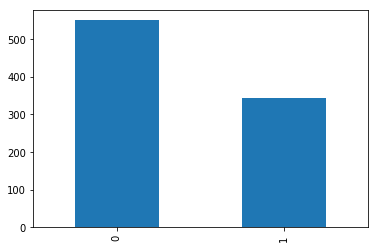

In [6]:
titanic['Survived'].value_counts().plot(kind='bar')
plt.show()

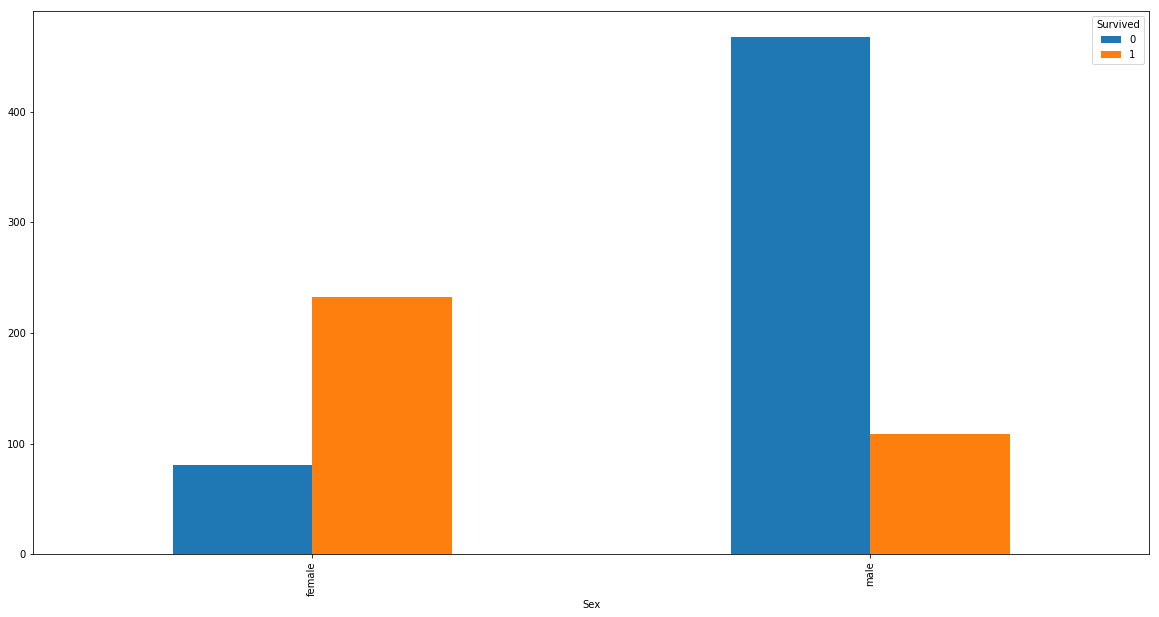

In [7]:
sex_df = titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar',figsize=(20,10))
plt.show()

In [8]:
category_feature = [col for col in titanic.columns if titanic[col]
                   .dtypes == "object"]

In [9]:
numerical_feature =list(set(titanic.columns) - set(category_feature)
                       - set(['Passengerld','Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'PassengerId', 'SibSp'], dtype='<U11')

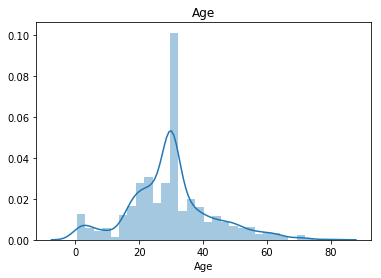

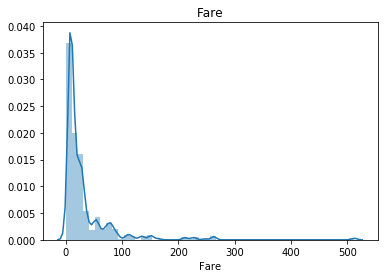

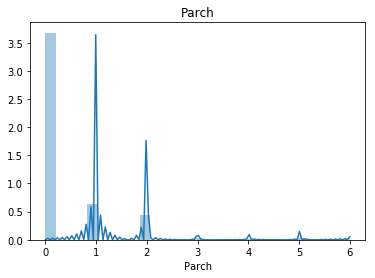

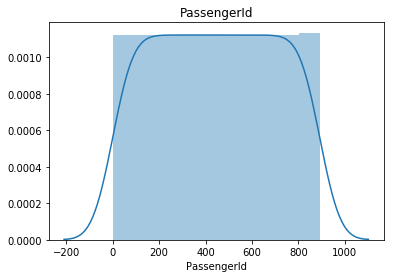

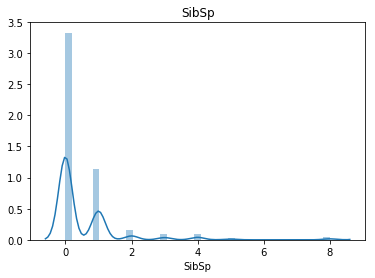

In [10]:
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(),col])
    plt.title(col)
    plt.show()

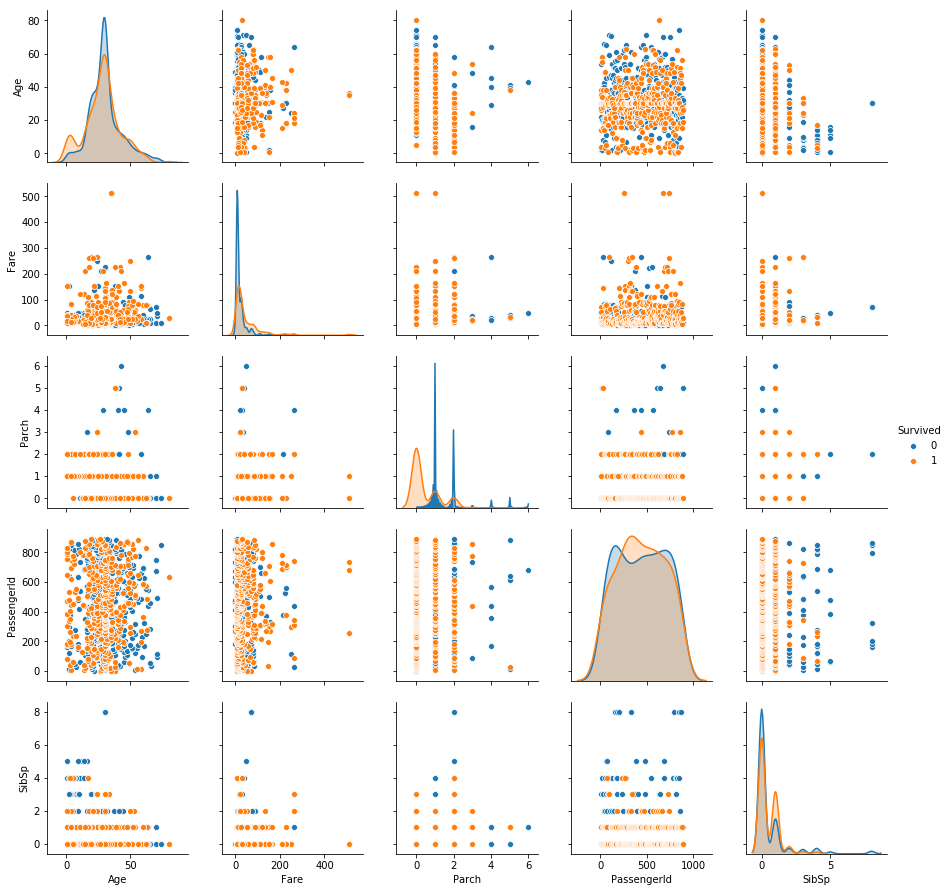

In [11]:
sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue=
                    'Survived',x_vars=numerical_feature,
            y_vars=numerical_feature)
plt.show()

In [12]:
trn= pd.read_csv('C:/Users/Affinity/Downloads/ssd_train.csv')
tst= pd.read_csv('C:/Users/Affinity/Downloads/ssd_test.csv')


In [13]:
print(trn.shape,tst.shape)

(595212, 59) (892816, 58)


In [14]:
np.unique(trn['target'])

array([0, 1], dtype=int64)

In [15]:
tst['target']=np.nan
df=pd.concat([trn,tst],axis=0)

C:\ProgramData\Anaconda3\envs\mypy\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [17]:
def bar_plot(col,data,hue=None):
    f,ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col,hue=hue,data=data,alpha=0.5)
    plt.show()
    
def dist_plot(col,data):
    f,ax = plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(),kde=False,bins=10)
    
def bar_plot_ci(col,data):
    f,ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=col,y='target',data=data)
    plt.show()

In [18]:
binary=['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin',
       'ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin',
       'ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_calc_15_bin',
       'ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin',
        'ps_calc_20_bin']
#범주형
category =['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat',
          'ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat',
          'ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat',
          'ps_car_10_cat','ps_car_11_cat']
#정수형
integer =['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_calc_04',
          'ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09',
         'ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13',
         'ps_calc_14','ps_car_11_cat']
#실수형 변수
floats = ['ps_reg_01','ps_reg_02','ps_reg_03','ps_calc_01','ps_calc_02',
         'ps_calc_03','ps_car_12','ps_car_13','ps_car_14',
         'ps_car_15']

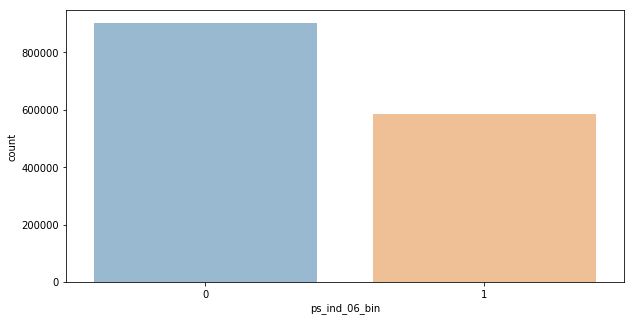

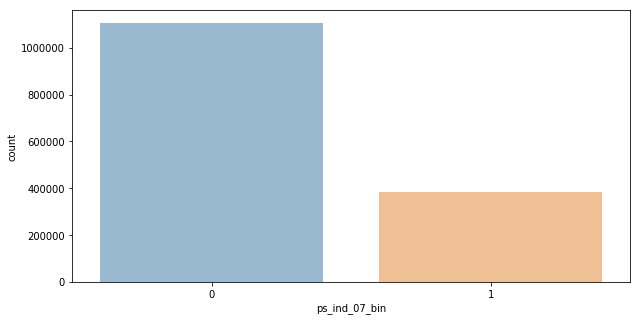

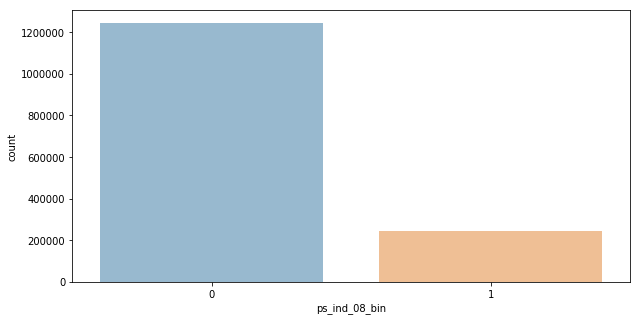

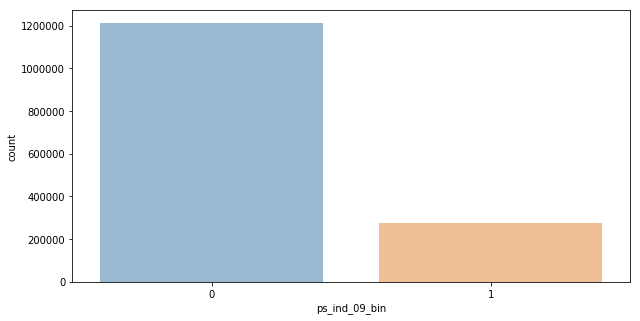

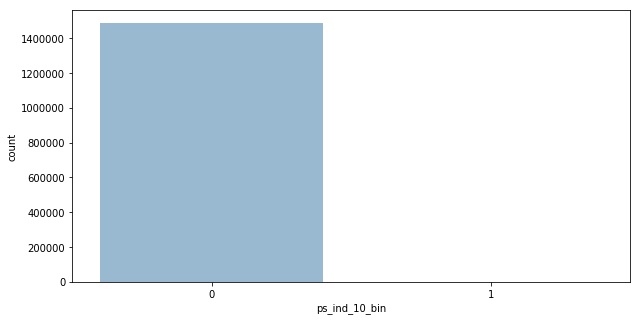

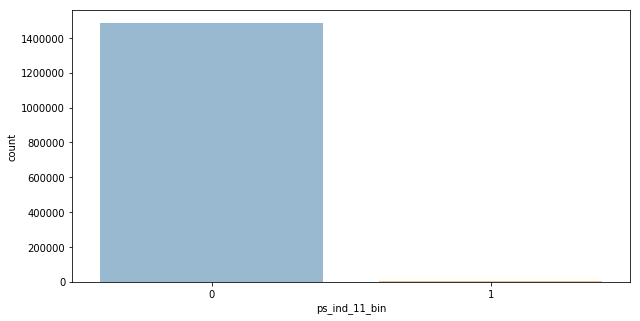

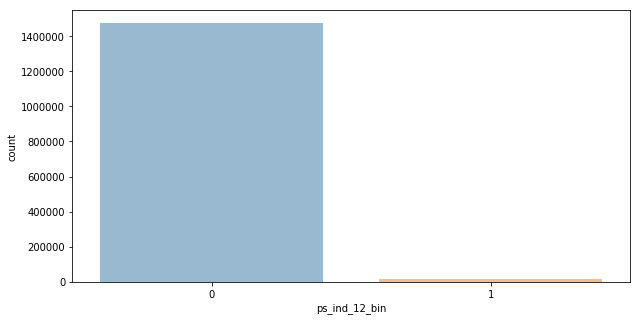

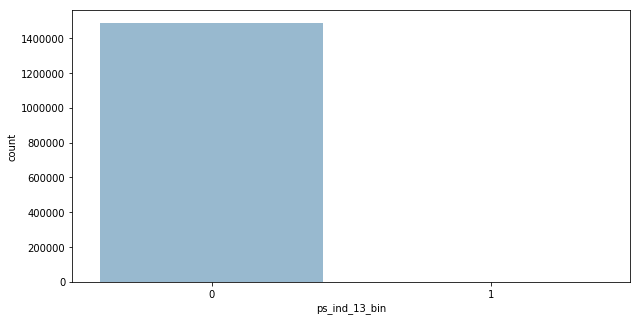

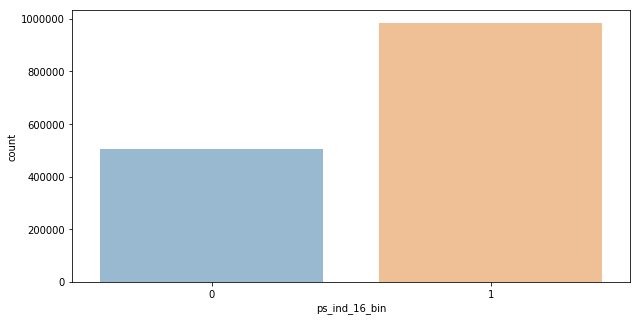

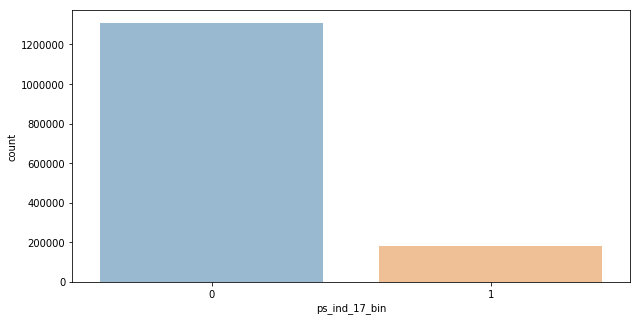

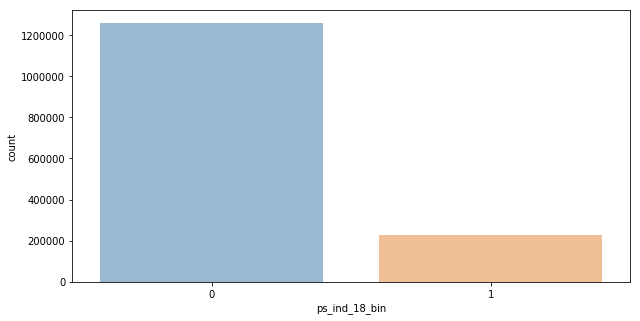

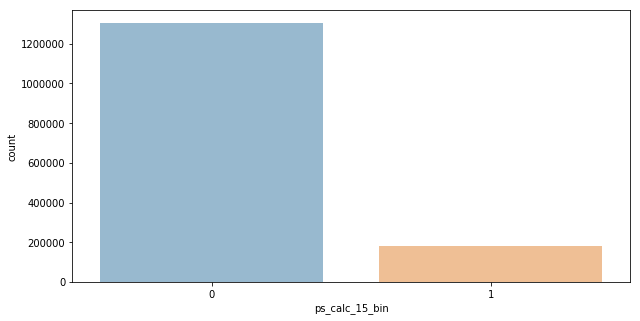

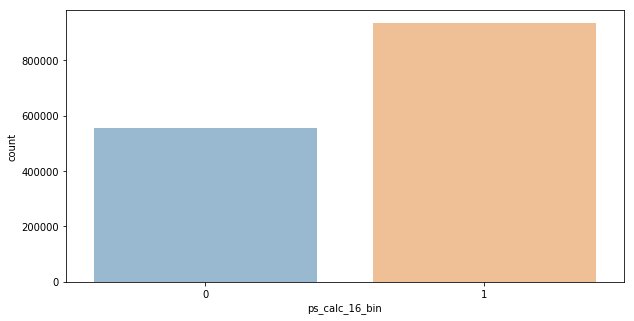

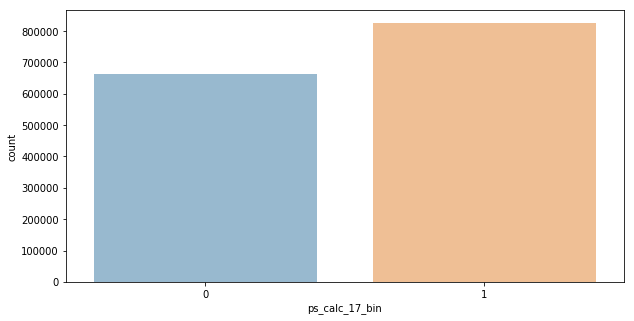

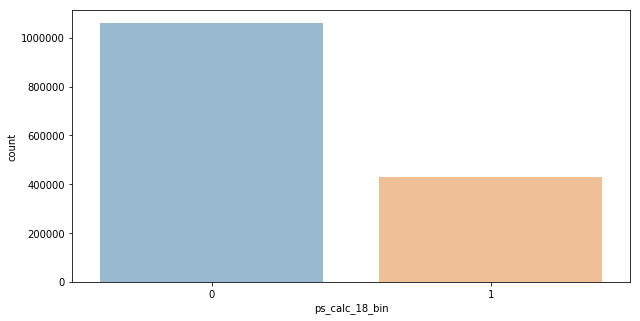

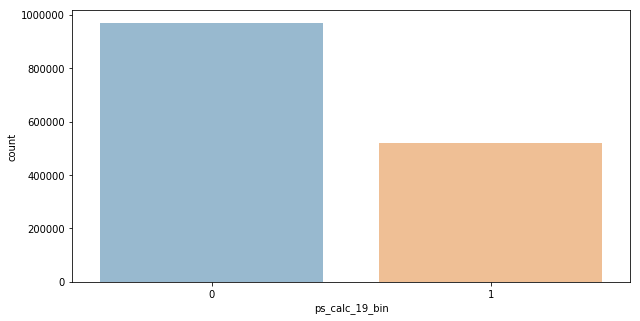

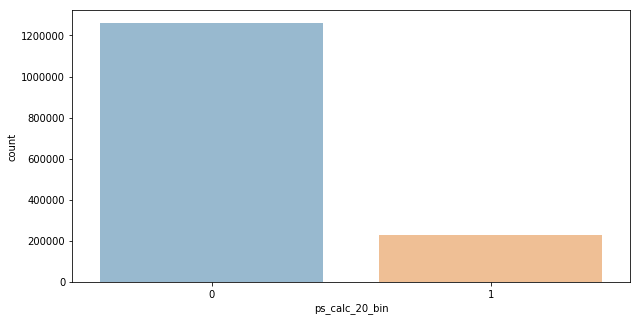

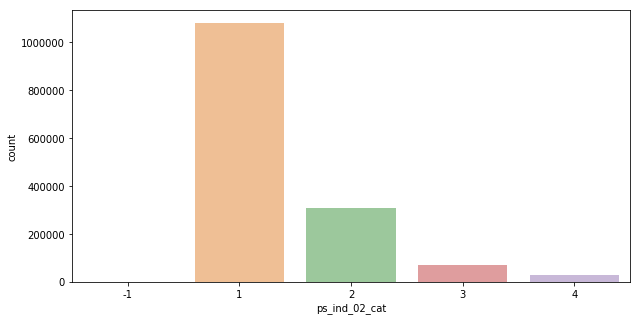

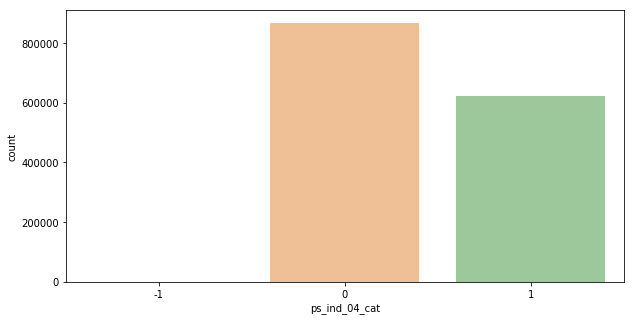

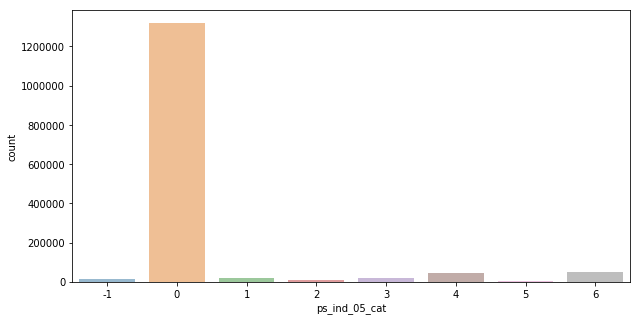

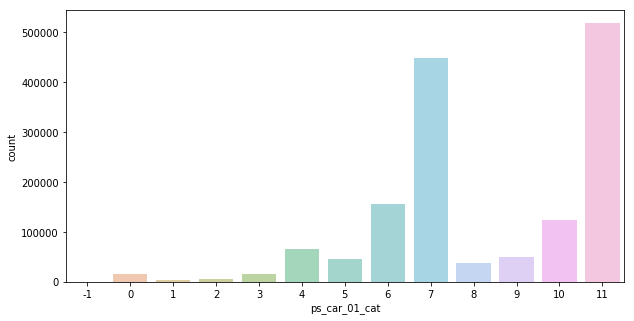

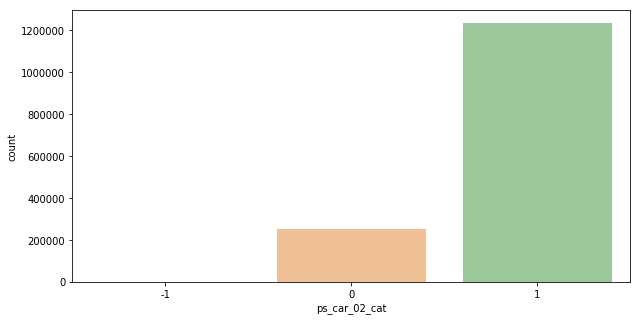

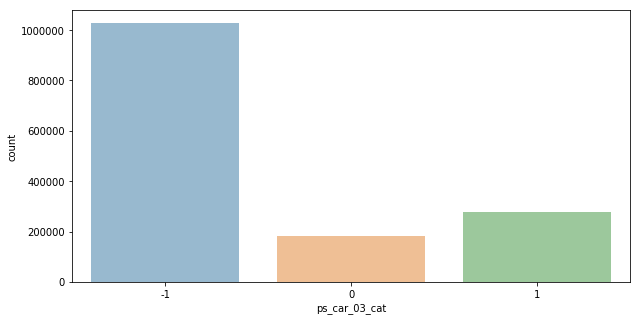

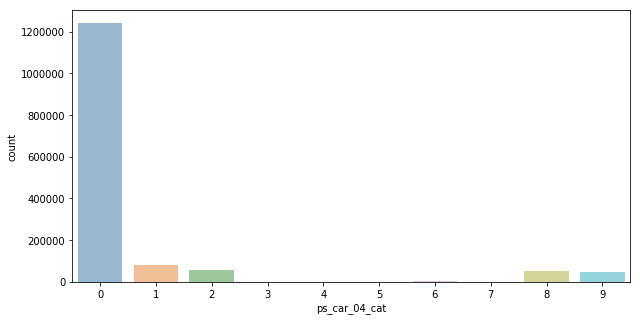

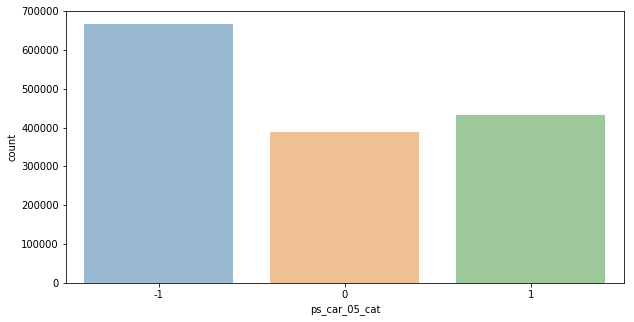

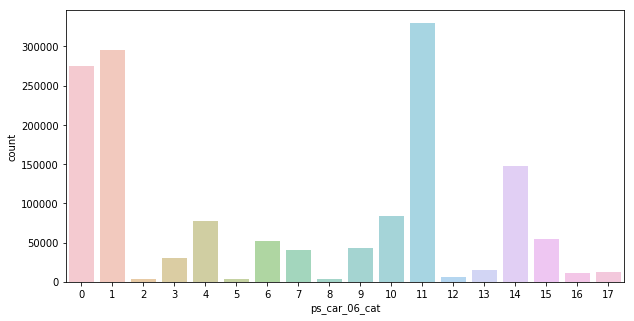

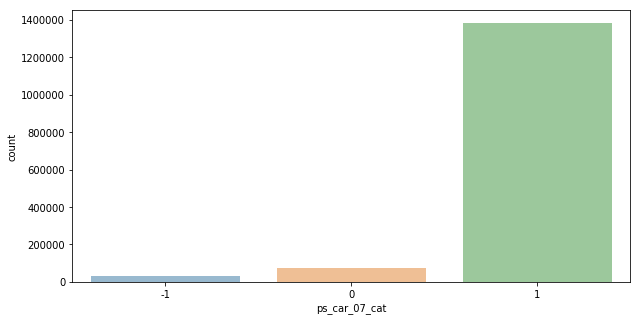

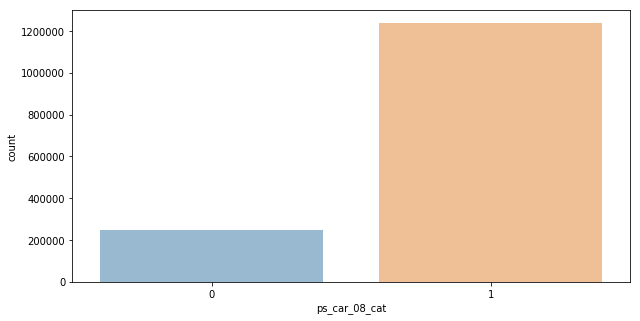

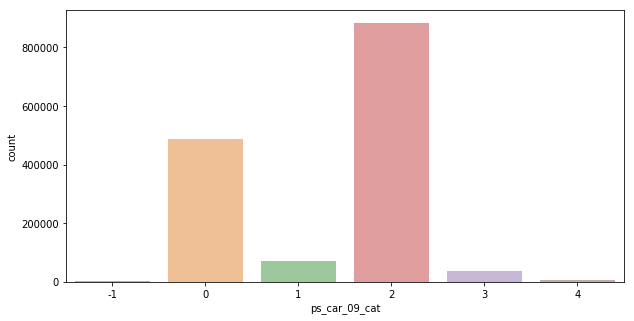

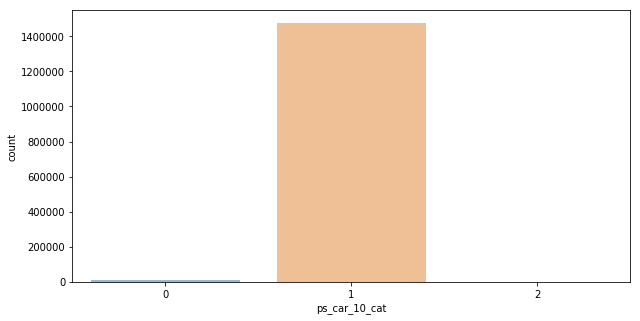

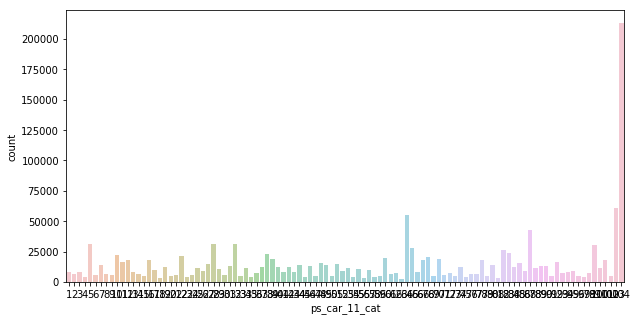

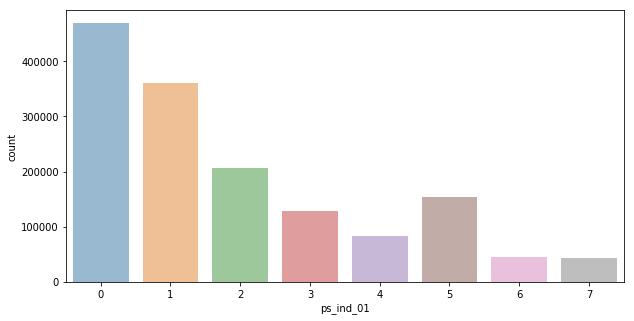

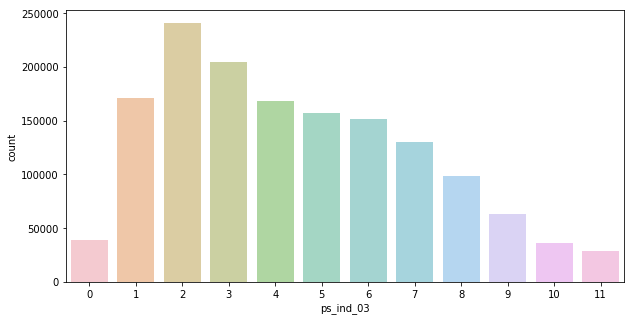

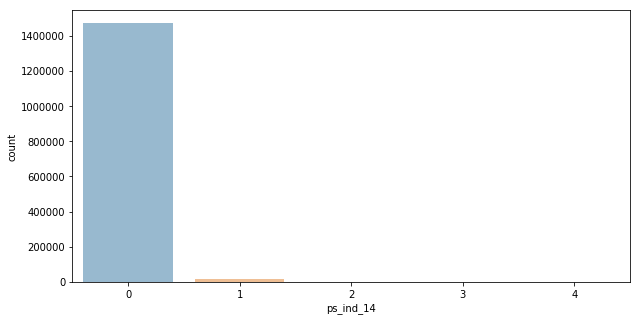

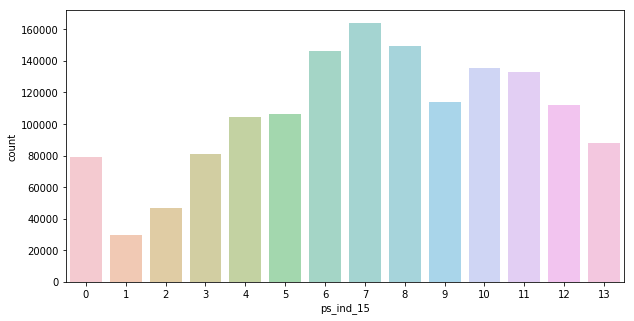

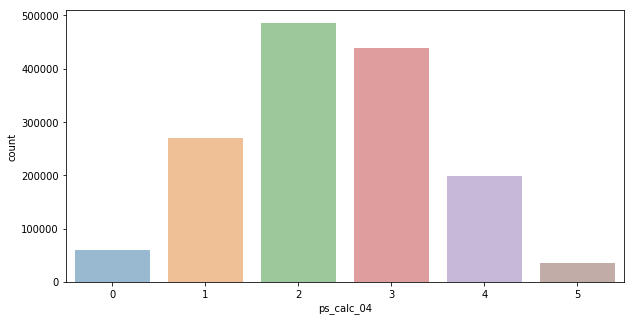

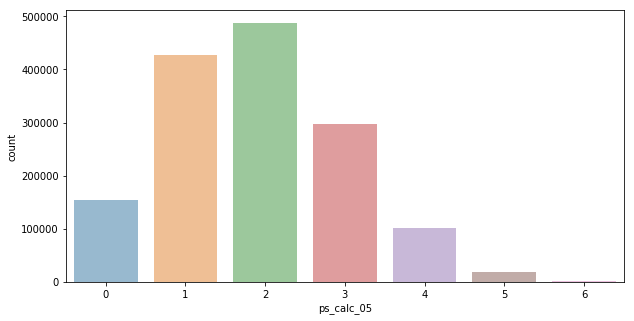

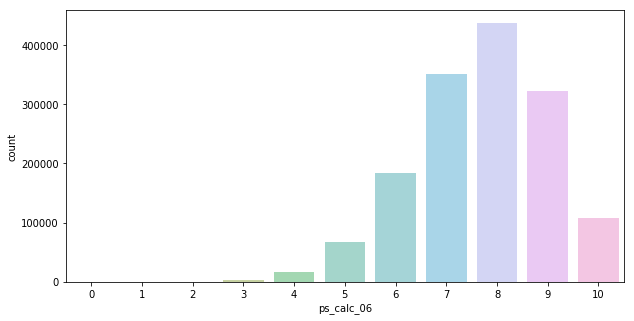

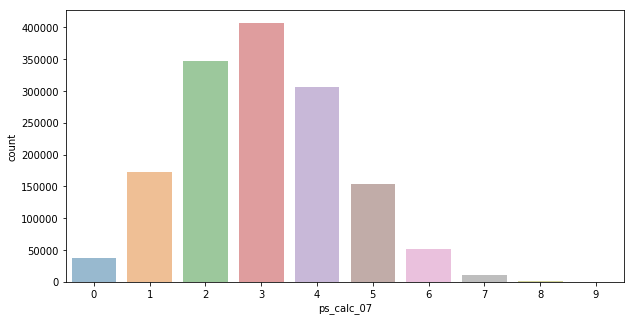

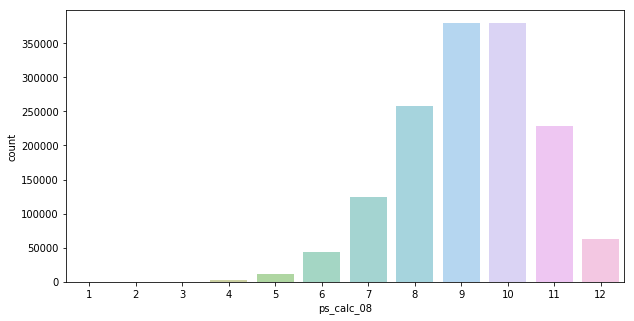

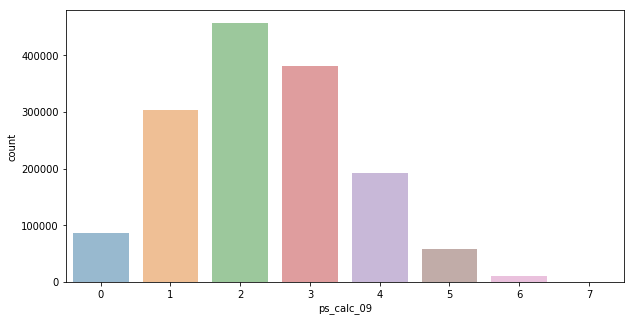

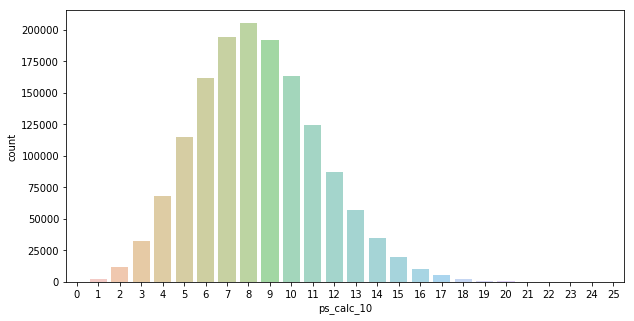

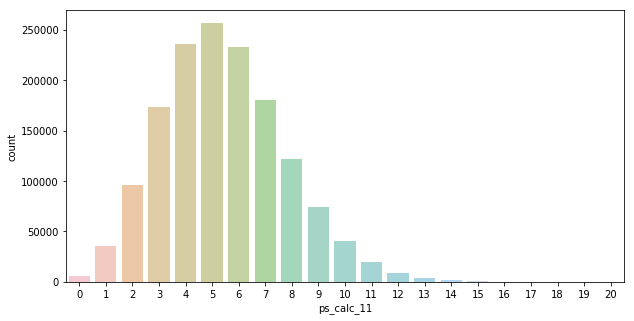

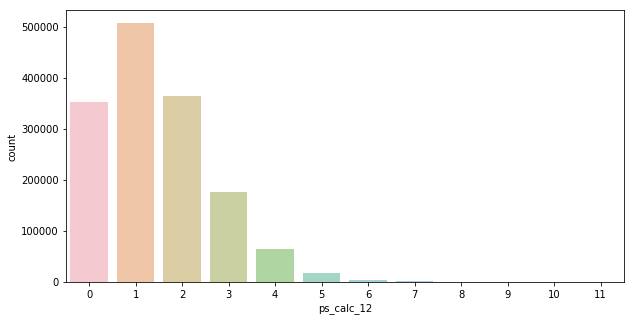

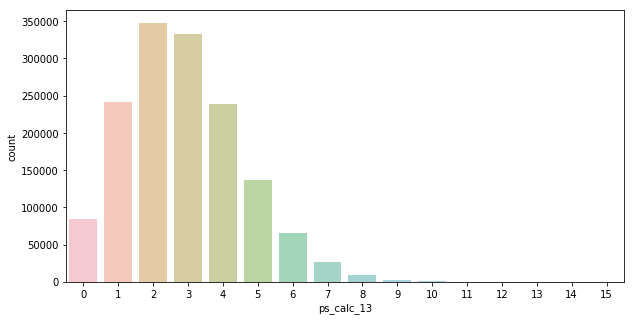

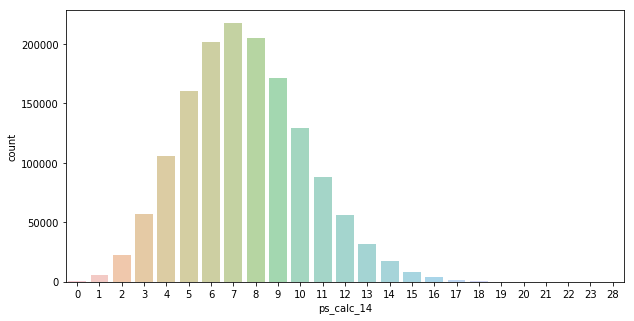

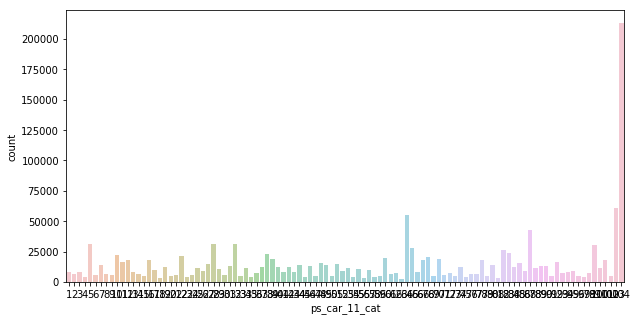

In [19]:
for col in binary + category + integer:
    bar_plot(col,df)

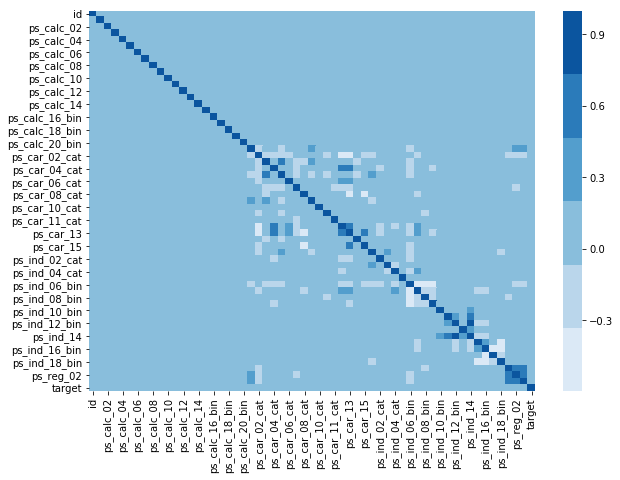

In [20]:
corr=df.corr()
cmap = sns.color_palette("Blues")
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr,cmap=cmap)

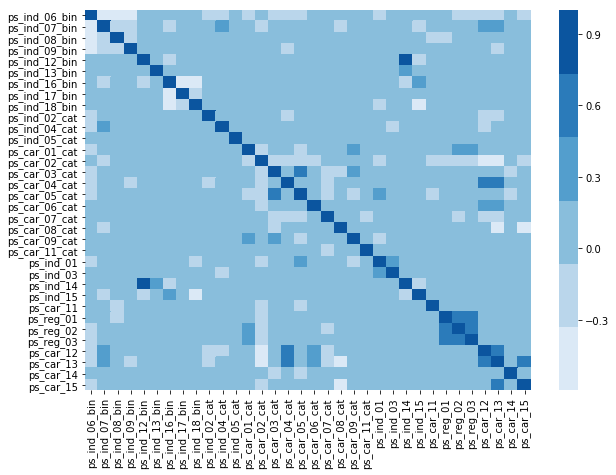

In [21]:
features= ['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin',
          'ps_ind_12_bin','ps_ind_13_bin','ps_ind_16_bin','ps_ind_17_bin',
          'ps_ind_18_bin','ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat',
          'ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat',
          'ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat',
          'ps_car_09_cat','ps_car_11_cat','ps_ind_01','ps_ind_03',
          'ps_ind_14','ps_ind_15','ps_car_11','ps_reg_01','ps_reg_02',
          'ps_reg_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15']
corr_sub = df[features].corr()
f,ax =plt.subplots(figsize=(10,7))
sns.heatmap(corr_sub,cmap=cmap)

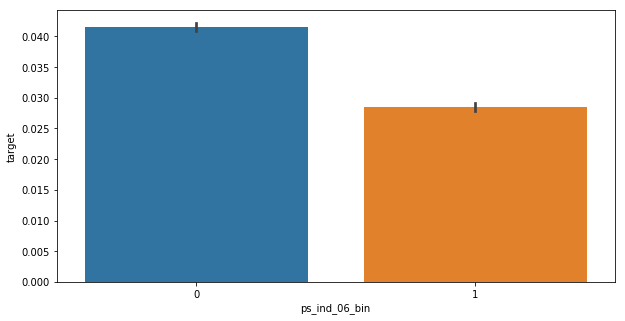

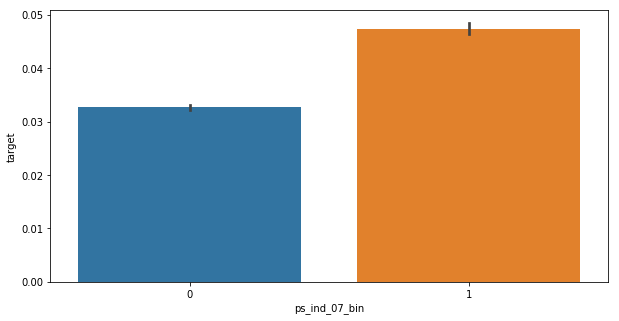

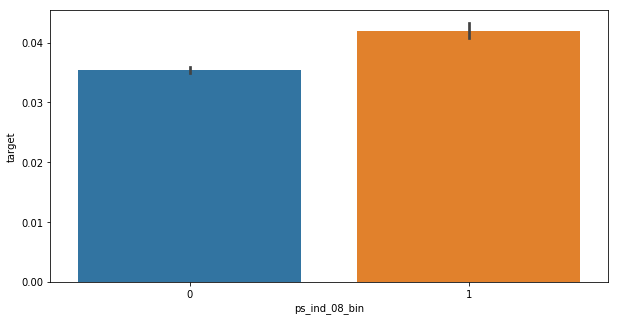

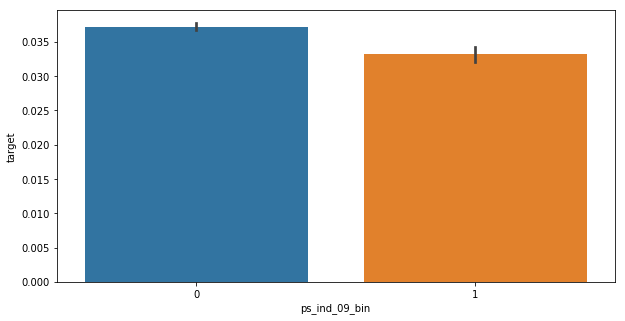

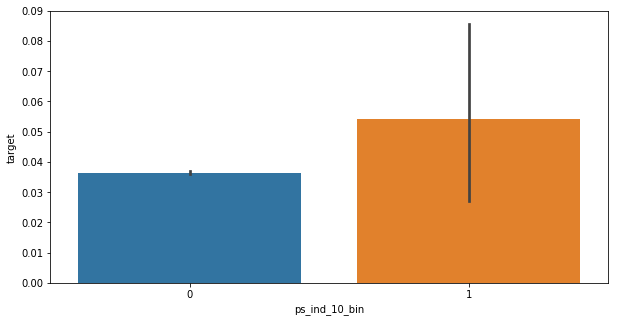

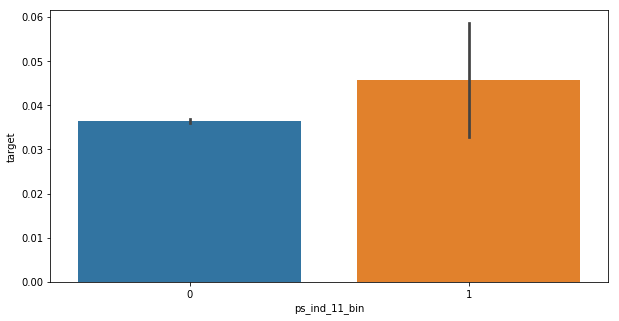

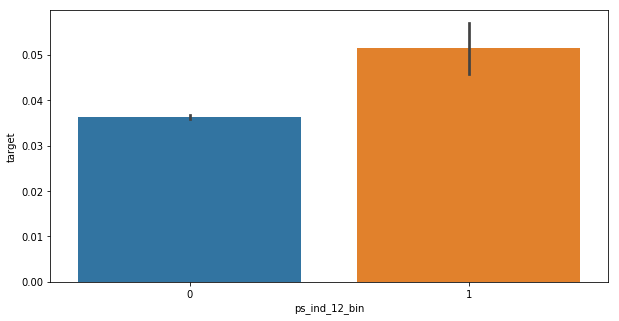

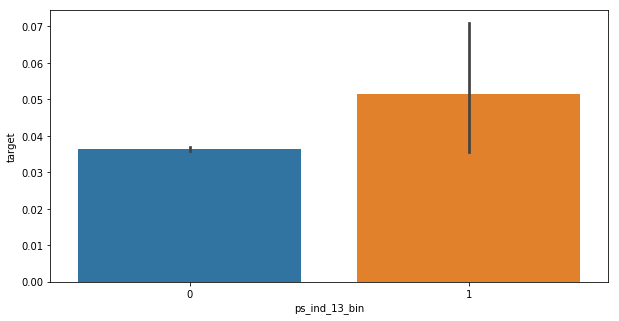

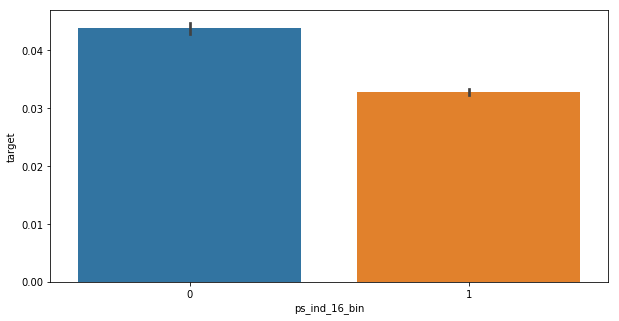

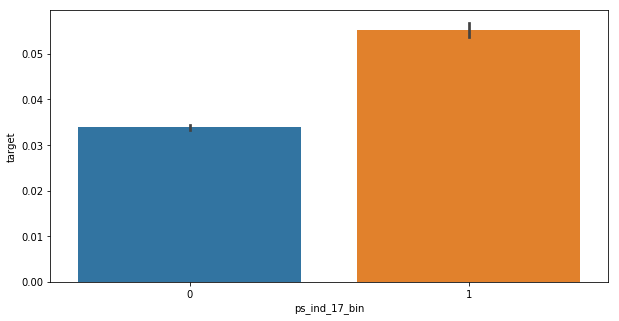

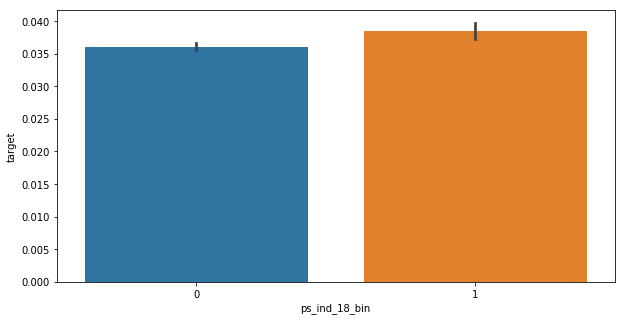

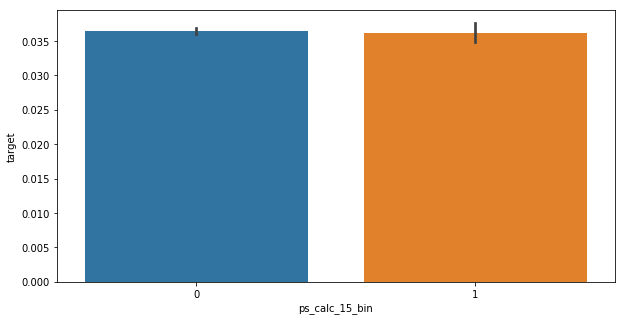

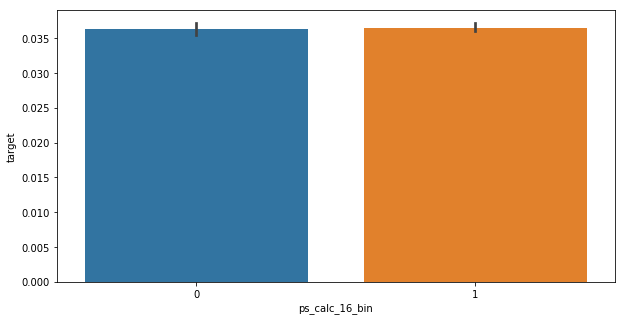

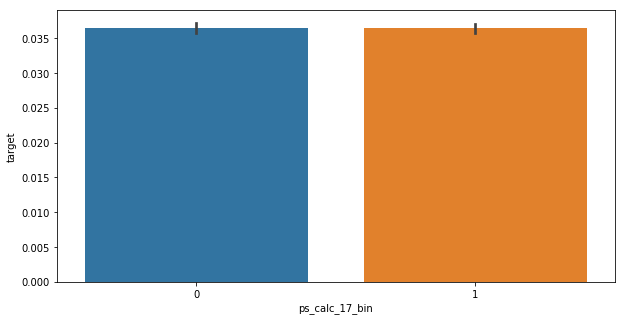

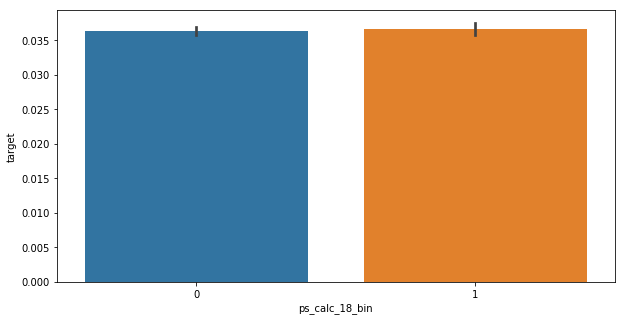

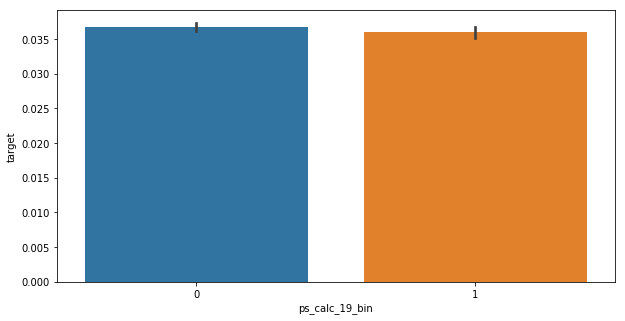

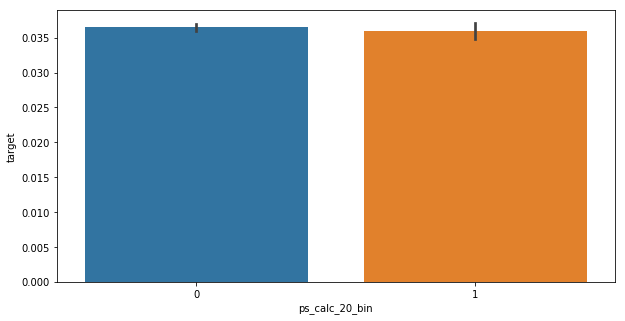

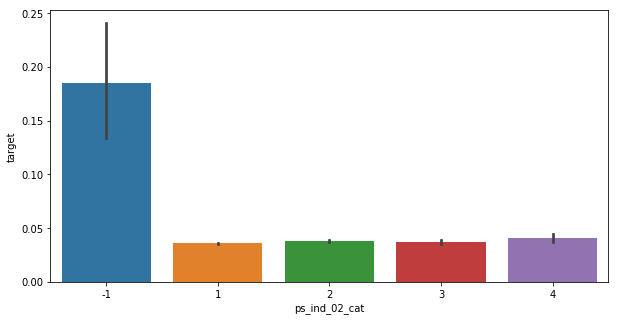

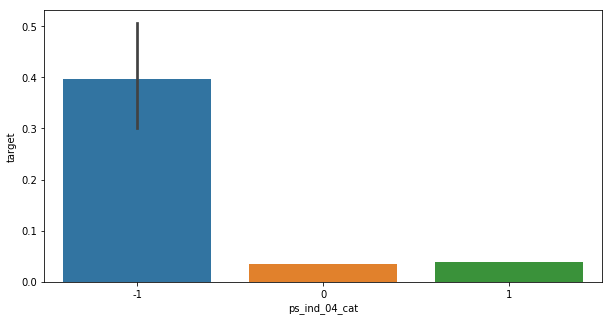

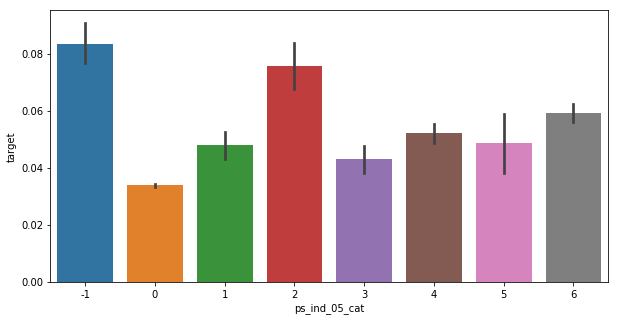

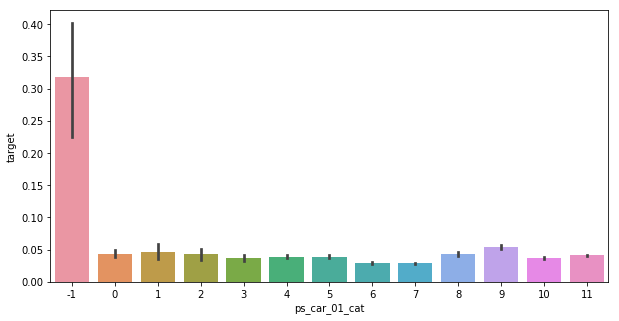

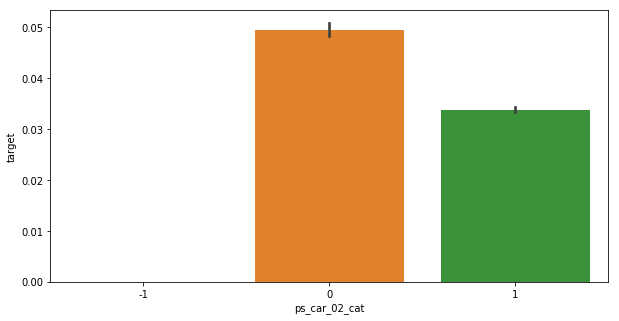

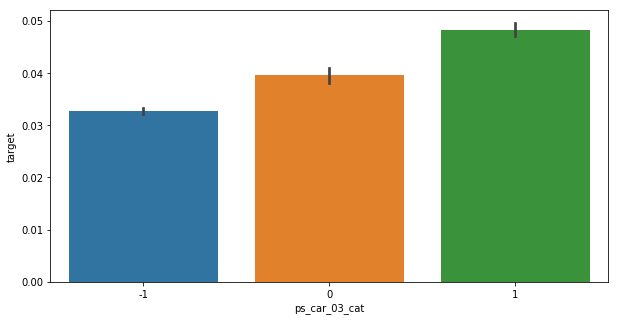

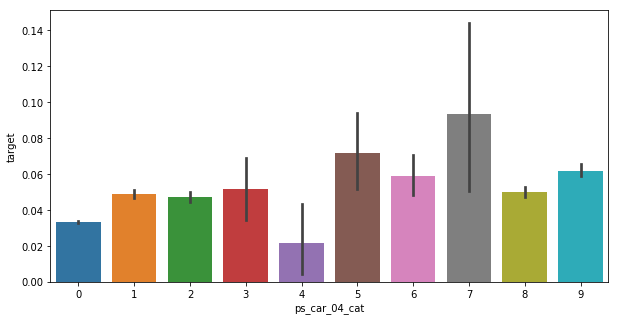

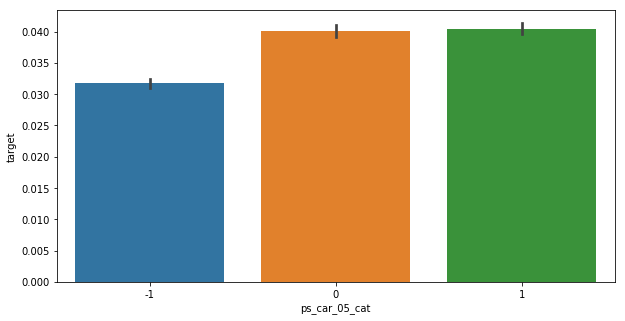

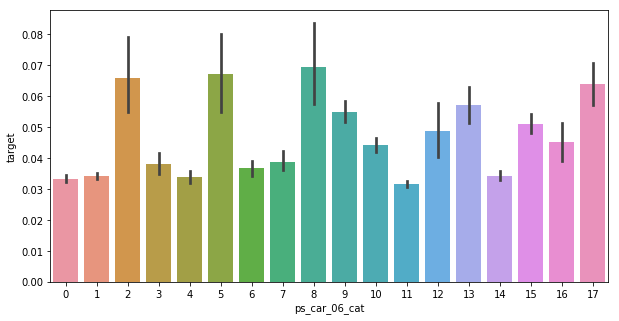

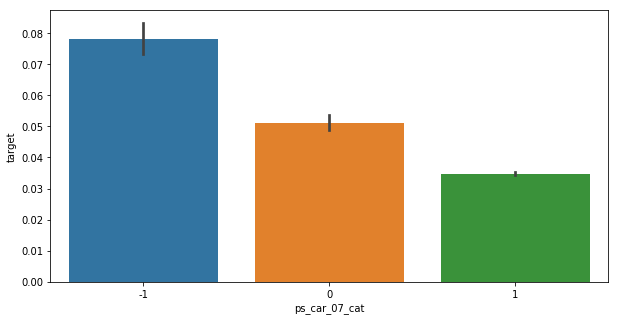

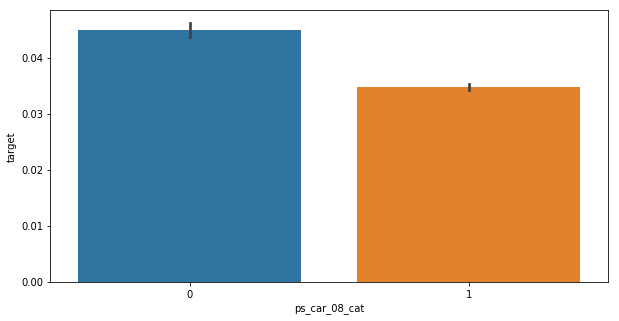

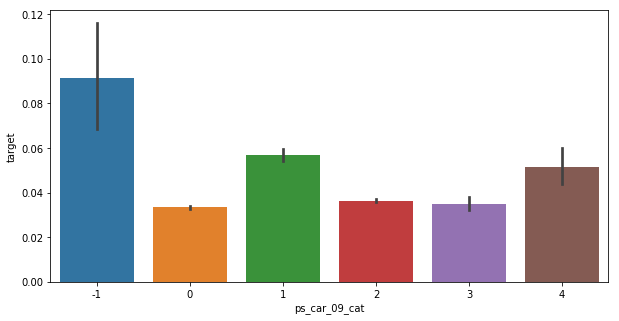

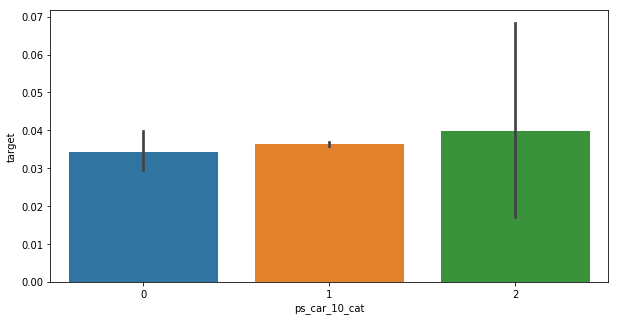

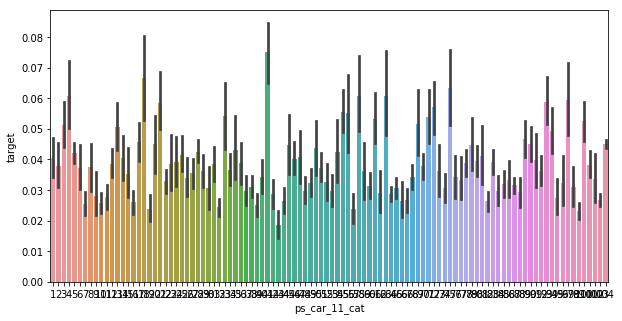

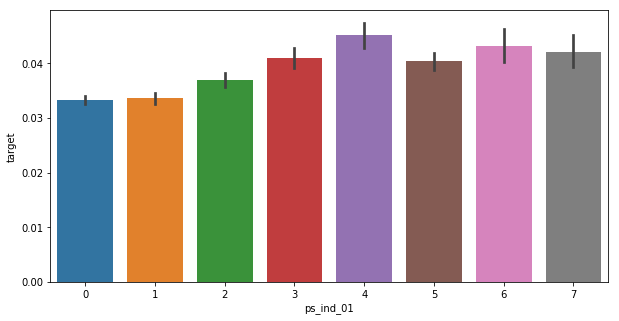

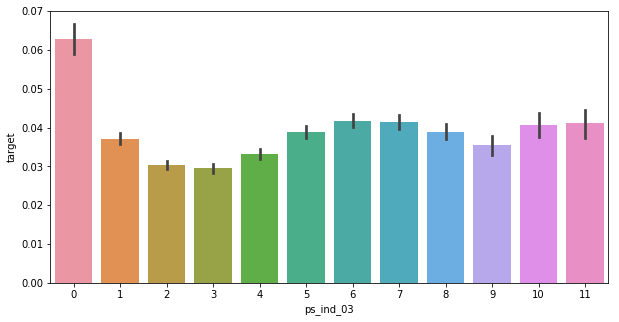

In [ ]:
for col in (binary + category + integer):
    bar_plot_ci(col,df)